# Tugas Cleaning Data

Nama: Diah Ayu Puspasari

NIM: 0110223052

Data Engineering 02

In [1]:
# import library pandas dan yang lain
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# menghubungkan dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# mengimpoert file dari google drive
path = '/content/drive/MyDrive/datasciece/dataset'

In [5]:
# membaca file csv dirty data
dirty_data = pd.read_csv(path + '/dirtydata.csv')
dirty_data

,ID,Nama Pegawai,Tempat Lahir,Tanggal Lahir,Jenis Kelamin,Kota Tempat Tinggal,No HP,Jam Kerja,Berat
0,10010104,Nugroho Aldi Saputra,Jakarta,11-06-1982,Pria,Depok,NaN,8,78
1,10010106,Henry Rosyid,Jakarta,13-07-1971,L,Bogor,8.991111e+10,8 AM,52
2,10010107,Misna Oktina,Jakarta,14-04-1971,NaN,NaN,NaN,NaN,74
3,10010119,Reza Maryanto,Sukabumi,31-01-1981,L,Depok,NaN,8:00,62.5
4,10010108,Lukman Hakim,Majalengka,14-07-1988,L,Bogor,8.122222e+10,8,"82,5"
5,10010109,Dwi Primardiansyah,Pekalongan,15-05-1983,L,Bogor,8.883333e+10,9,52
6,10010107,Misna Oktina,Jakarta,14-04-1971,Wanita,Depok,NaN,8:00,97
7,10010111,Bachtiar Hermawan,Jakarta,23-06-1963,Laki-Laki,Jakarta,8.151112e+10,9,890
8,10010112,Luthfiansyah,Majalengka,24-08-1989,L,Depok,8.582223e+10,8,69
9,10010120,Zaki Adityawijaya,Jakarta,31-08-1987,L,Depok,8.125556e+10,9,66


In [6]:
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   21 non-null     int64  
 1   Nama Pegawai         21 non-null     object 
 2   Tempat Lahir         21 non-null     object 
 3   Tanggal Lahir        21 non-null     object 
 4   Jenis Kelamin        20 non-null     object 
 5   Kota Tempat Tinggal  20 non-null     object 
 6   No HP                15 non-null     float64
 7   Jam Kerja            20 non-null     object 
 8   Berat                21 non-null     object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.6+ KB


## Mengubah Tipe Data

In [9]:
# mengubah tipe data 'Tempat Lahir':'category'
dirty_data['Tempat Lahir'] = dirty_data['Tempat Lahir'].astype('category')

In [11]:
# mengubah tipe data (transformasi) Tanggal Lahir ke datetime
dirty_data['Tanggal Lahir'] = pd.to_datetime(dirty_data['Tanggal Lahir'], format='%d-%m-%Y', errors='coerce')

In [17]:
# mengubah tipe data berat menjadi float
dirty_data['Berat'] = dirty_data['Berat'].str.extract('(\d+\.?\d*)').astype(float)

In [26]:
# mengubah jam kerja menjadi int
dirty_data['Jam Kerja'] = pd.to_numeric(dirty_data['Jam Kerja'].str.extract('(\d+)', expand=False), errors='coerce').astype('Int64')

In [27]:
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   21 non-null     int64         
 1   Nama Pegawai         21 non-null     object        
 2   Tempat Lahir         21 non-null     category      
 3   Tanggal Lahir        21 non-null     datetime64[ns]
 4   Jenis Kelamin        20 non-null     object        
 5   Kota Tempat Tinggal  20 non-null     object        
 6   No HP                21 non-null     object        
 7   Jam Kerja            20 non-null     Int64         
 8   Berat                21 non-null     float64       
dtypes: Int64(1), category(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 1.8+ KB


## Identifikasi Nilai Unik / Outliers

In [19]:
dirty_data['Jenis Kelamin'].unique()

array(['Pria', 'L', nan, 'Wanita', 'Laki-Laki', 'P', 'Perempuan'],
      dtype=object)

In [39]:
# maping penulisan tidak seragam pada Jenis Kelamin
dirty_data['Jenis Kelamin'] = dirty_data['Jenis Kelamin'].map({'Pria' : 'L', 'L' : 'L', 'Wanita' : 'P', 'Laki-Laki' : 'L', 'P' : 'P', 'Perempuan' : 'P'})

In [21]:
# mencari duplikat
dirty_data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [40]:
dirty_data[dirty_data.duplicated(['ID', 'Nama Pegawai'], keep=False)]

,ID,Nama Pegawai,Tempat Lahir,Tanggal Lahir,Jenis Kelamin,Kota Tempat Tinggal,No HP,Jam Kerja,Berat
2,10010107,Misna Oktina,Jakarta,1971-04-14,NaN,NaN,nan,0,74.0
6,10010107,Misna Oktina,Jakarta,1971-04-14,P,Depok,nan,8,97.0


In [41]:
# menghapus index 2
dirty_data.drop(2)

,ID,Nama Pegawai,Tempat Lahir,Tanggal Lahir,Jenis Kelamin,Kota Tempat Tinggal,No HP,Jam Kerja,Berat
0,10010104,Nugroho Aldi Saputra,Jakarta,1982-06-11,L,Depok,nan,8,78.0
1,10010106,Henry Rosyid,Jakarta,1971-07-13,L,Bogor,89911114444.0,8,52.0
3,10010119,Reza Maryanto,Sukabumi,1981-01-31,L,Depok,nan,8,62.5
4,10010108,Lukman Hakim,Majalengka,1988-07-14,L,Bogor,81222224444.0,8,82.0
5,10010109,Dwi Primardiansyah,Pekalongan,1983-05-15,L,Bogor,88833334444.0,9,52.0
6,10010107,Misna Oktina,Jakarta,1971-04-14,P,Depok,nan,8,97.0
7,10010111,Bachtiar Hermawan,Jakarta,1963-06-23,L,Jakarta,81511115555.0,9,89.0
8,10010112,Luthfiansyah,Majalengka,1989-08-24,L,Depok,85822225555.0,8,69.0
9,10010120,Zaki Adityawijaya,Jakarta,1987-08-31,L,Depok,81255556666.0,9,66.0
10,10010110,Ahmad Firdaus,Pekalongan,1980-08-17,L,Jakarta,nan,9,83.0


<Axes: >

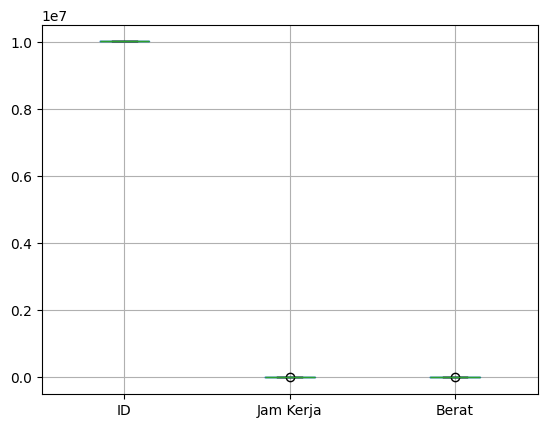

In [28]:
dirty_data.boxplot()

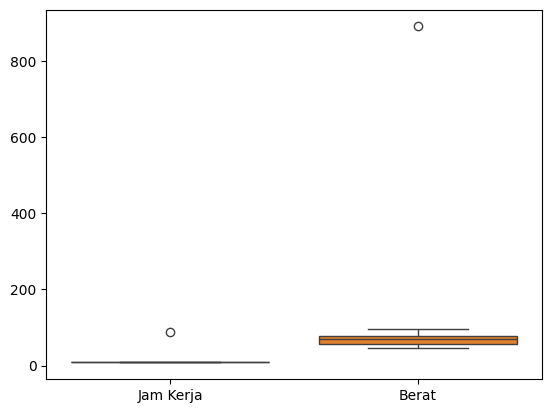

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hanya ambil kolom numerik yang relevan
numeric_cols = ['Jam Kerja', 'Berat']
sns.boxplot(data=dirty_data[numeric_cols])
plt.show()

In [32]:
dirty_data['Jam Kerja'].unique()

<IntegerArray>
[8, <NA>, 9, 88]
Length: 4, dtype: Int64

In [33]:
# mengganti 88 menjadi 8 dan NA menjadi 0
dirty_data['Jam Kerja'] = dirty_data['Jam Kerja'].replace(88, 8)
dirty_data['Jam Kerja'] = dirty_data['Jam Kerja'].replace(np.nan, 0)

In [34]:
dirty_data['Berat'].unique()

array([ 78. ,  52. ,  74. ,  62.5,  82. ,  97. , 890. ,  69. ,  66. ,
        83. ,  70. ,  47.5,  77. ,  73. ,  56. ,  45. ,  61. ,  65. ])

In [36]:
# mengganti 890 menjadi 89
dirty_data['Berat'] = dirty_data['Berat'].replace(890, 89)

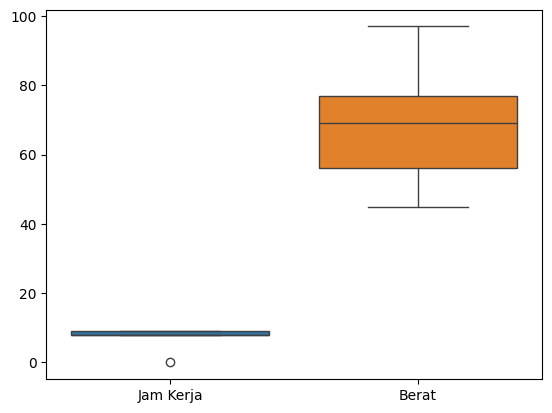

In [37]:
# cek kembali outliers
import seaborn as sns
import matplotlib.pyplot as plt

# Hanya ambil kolom numerik yang relevan
numeric_cols = ['Jam Kerja', 'Berat']
sns.boxplot(data=dirty_data[numeric_cols])
plt.show()

In [42]:
dirty_data

,ID,Nama Pegawai,Tempat Lahir,Tanggal Lahir,Jenis Kelamin,Kota Tempat Tinggal,No HP,Jam Kerja,Berat
0,10010104,Nugroho Aldi Saputra,Jakarta,1982-06-11,L,Depok,nan,8,78.0
1,10010106,Henry Rosyid,Jakarta,1971-07-13,L,Bogor,89911114444.0,8,52.0
2,10010107,Misna Oktina,Jakarta,1971-04-14,NaN,NaN,nan,0,74.0
3,10010119,Reza Maryanto,Sukabumi,1981-01-31,L,Depok,nan,8,62.5
4,10010108,Lukman Hakim,Majalengka,1988-07-14,L,Bogor,81222224444.0,8,82.0
5,10010109,Dwi Primardiansyah,Pekalongan,1983-05-15,L,Bogor,88833334444.0,9,52.0
6,10010107,Misna Oktina,Jakarta,1971-04-14,P,Depok,nan,8,97.0
7,10010111,Bachtiar Hermawan,Jakarta,1963-06-23,L,Jakarta,81511115555.0,9,89.0
8,10010112,Luthfiansyah,Majalengka,1989-08-24,L,Depok,85822225555.0,8,69.0
9,10010120,Zaki Adityawijaya,Jakarta,1987-08-31,L,Depok,81255556666.0,9,66.0


In [44]:
# mengisi nilai nan  di Jenis kelamin menjadi P
dirty_data['Jenis Kelamin'] = dirty_data['Jenis Kelamin'].fillna('P')

In [48]:
dirty_data

,ID,Nama Pegawai,Tempat Lahir,Tanggal Lahir,Jenis Kelamin,Kota Tempat Tinggal,No HP,Jam Kerja,Berat
0,10010104,Nugroho Aldi Saputra,Jakarta,1982-06-11,L,Depok,nan,8,78.0
1,10010106,Henry Rosyid,Jakarta,1971-07-13,L,Bogor,89911114444.0,8,52.0
2,10010107,Misna Oktina,Jakarta,1971-04-14,P,NaN,nan,0,74.0
3,10010119,Reza Maryanto,Sukabumi,1981-01-31,L,Depok,nan,8,62.5
4,10010108,Lukman Hakim,Majalengka,1988-07-14,L,Bogor,81222224444.0,8,82.0
5,10010109,Dwi Primardiansyah,Pekalongan,1983-05-15,L,Bogor,88833334444.0,9,52.0
6,10010107,Misna Oktina,Jakarta,1971-04-14,P,Depok,nan,8,97.0
7,10010111,Bachtiar Hermawan,Jakarta,1963-06-23,L,Jakarta,81511115555.0,9,89.0
8,10010112,Luthfiansyah,Majalengka,1989-08-24,L,Depok,85822225555.0,8,69.0
9,10010120,Zaki Adityawijaya,Jakarta,1987-08-31,L,Depok,81255556666.0,9,66.0


## Menambahkan Data Baru

In [49]:
data_baru = pd.DataFrame([{
    'ID': 10010120,
    'Nama Pegawai': 'Diah Ayu Puspasari',
    'Tempat Lahir': 'Jakarta',
    'Tanggal Lahir': pd.to_datetime('2000-02-22'),
    'Jenis Kelamin': 'P',
    'Kota Tempat Tinggal': 'Jakarta',
    'No HP': '089999999999',
    'Jam Kerja': 9,
    'Berat': 44.0
}])

dirty_data = pd.concat([dirty_data, data_baru], ignore_index=True)

In [50]:
dirty_data

,ID,Nama Pegawai,Tempat Lahir,Tanggal Lahir,Jenis Kelamin,Kota Tempat Tinggal,No HP,Jam Kerja,Berat
0,10010104,Nugroho Aldi Saputra,Jakarta,1982-06-11,L,Depok,nan,8,78.0
1,10010106,Henry Rosyid,Jakarta,1971-07-13,L,Bogor,89911114444.0,8,52.0
2,10010107,Misna Oktina,Jakarta,1971-04-14,P,NaN,nan,0,74.0
3,10010119,Reza Maryanto,Sukabumi,1981-01-31,L,Depok,nan,8,62.5
4,10010108,Lukman Hakim,Majalengka,1988-07-14,L,Bogor,81222224444.0,8,82.0
5,10010109,Dwi Primardiansyah,Pekalongan,1983-05-15,L,Bogor,88833334444.0,9,52.0
6,10010107,Misna Oktina,Jakarta,1971-04-14,P,Depok,nan,8,97.0
7,10010111,Bachtiar Hermawan,Jakarta,1963-06-23,L,Jakarta,81511115555.0,9,89.0
8,10010112,Luthfiansyah,Majalengka,1989-08-24,L,Depok,85822225555.0,8,69.0
9,10010120,Zaki Adityawijaya,Jakarta,1987-08-31,L,Depok,81255556666.0,9,66.0


In [51]:
# menyimpan data yang sudah bersih
dirty_data.to_csv("data_bersih.csv", index=False)